In [3]:
%pip install torchvision
%pip install torchinfo
%pip install pytorchcv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.7 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 15.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# import module 설치

import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import pytorchcv


In [5]:
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms

# 데이터셋 불러오기 전에 transform 정의
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# FashionMNIST 데이터셋 로드
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)



100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Label: 9


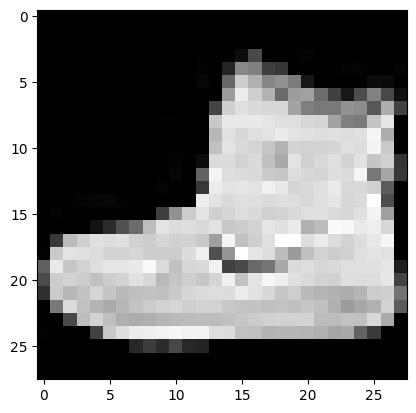

In [6]:
# 훈련 데이터의 첫 번째 이미지와 레이블 확인
image, label = trainset[0]
print("Label:", label)
plt.imshow(image.squeeze(), cmap='gray')
plt.show()

import matplotlib.pyplot as plt

# 데이터 추출
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# 이미지 시각화
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


[Epoch 1, Batch 200] loss: 0.726
[Epoch 1, Batch 400] loss: 0.465
[Epoch 1, Batch 600] loss: 0.401
[Epoch 2, Batch 200] loss: 0.349
[Epoch 2, Batch 400] loss: 0.342
[Epoch 2, Batch 600] loss: 0.327
[Epoch 3, Batch 200] loss: 0.285
[Epoch 3, Batch 400] loss: 0.279
[Epoch 3, Batch 600] loss: 0.284
[Epoch 4, Batch 200] loss: 0.255
[Epoch 4, Batch 400] loss: 0.255
[Epoch 4, Batch 600] loss: 0.245
[Epoch 5, Batch 200] loss: 0.223
[Epoch 5, Batch 400] loss: 0.227
[Epoch 5, Batch 600] loss: 0.223
Finished Training


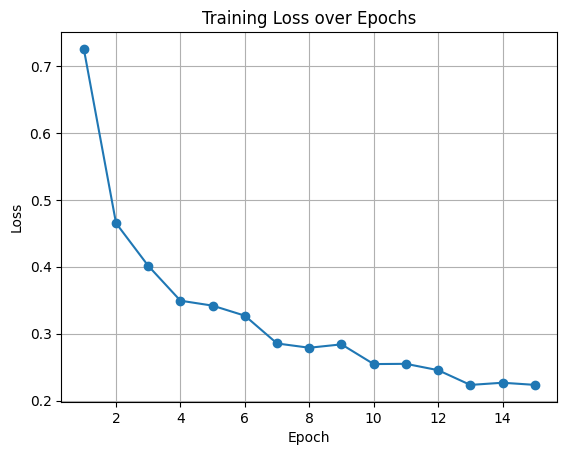

Accuracy of the network on the test images: 90.31%


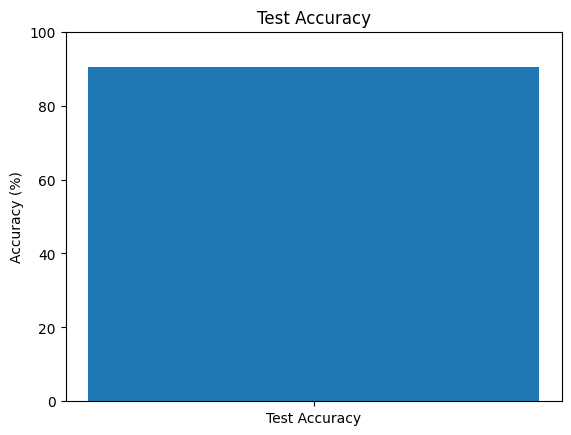

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt

# 데이터셋 불러오기 전에 transform 정의
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# FashionMNIST 데이터셋 로드
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# 데이터셋 크기 설정
total_size = len(dataset)
train_size = int(0.75 * total_size)  # 75%를 훈련 데이터로 설정
test_size = total_size - train_size  # 나머지를 테스트 데이터로 설정

# 데이터셋을 훈련 및 테스트로 분할
trainset, testset = random_split(dataset, [train_size, test_size])

# 데이터 로더 생성
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 생성
model = CNN()

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 에폭별 손실값 저장용 리스트
losses = []

# 모델 훈련
for epoch in range(5):  # 에폭 수 설정
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:  # 매 200 미니배치마다 출력
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 200:.3f}")
            losses.append(running_loss / 200)
            running_loss = 0.0

print("Finished Training")

# 에폭별 손실값 시각화
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

# 모델 테스트
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy of the network on the test images: {accuracy:.2f}%")

# 테스트 정확도 시각화
plt.bar(['Test Accuracy'], [accuracy])
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.ylim(0, 100)
plt.show()



In [8]:
print("Train dataset size:", len(trainset))
print("Test dataset size:", len(testset))

Train dataset size: 45000
Test dataset size: 15000


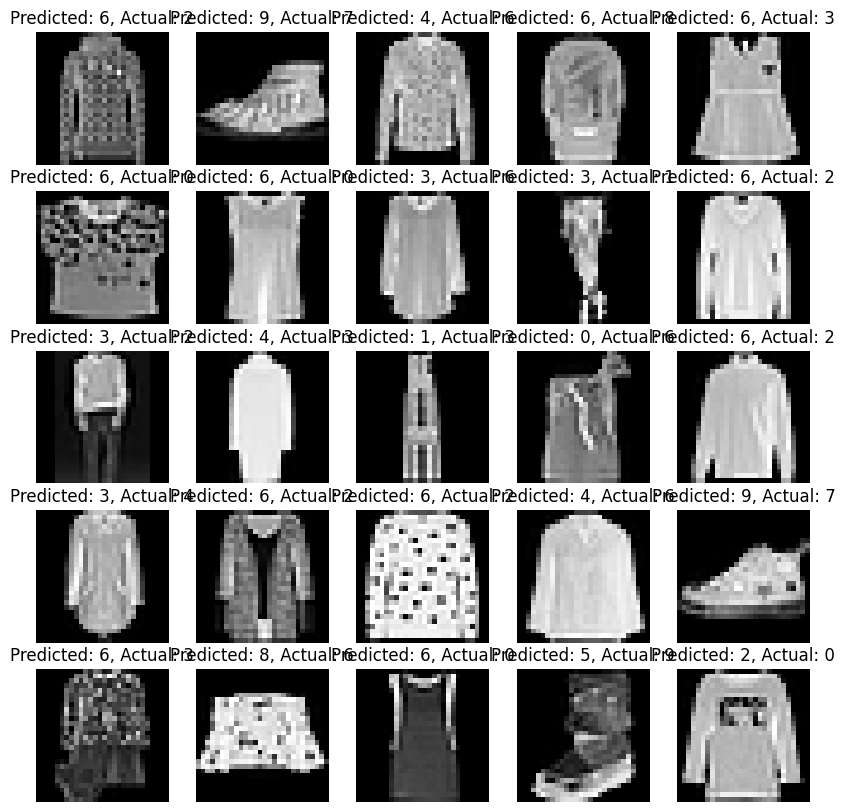

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 잘못 분류된 이미지 확인
model.eval()
misclassified_images = []
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        misclassified_mask = predicted != labels
        misclassified_images.extend(inputs[misclassified_mask])
        predicted_labels.extend(predicted[misclassified_mask])
        true_labels.extend(labels[misclassified_mask])

# 잘못 분류된 이미지 및 예측과 실제 레이블 시각화
num_images = len(misclassified_images)
num_display = min(num_images, 10)  # 최대 10개 이미지까지 표시

plt.figure(figsize=(10, 10))
for i in range(num_display):
    plt.subplot(5, 5, i + 1)
    plt.imshow(misclassified_images[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {true_labels[i]}")
    plt.axis('off')

plt.show()


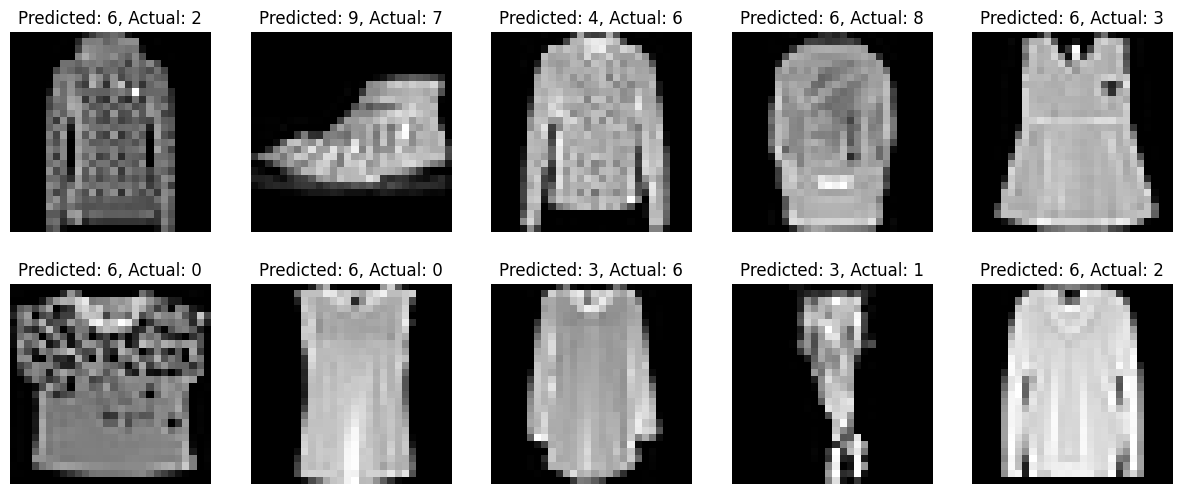

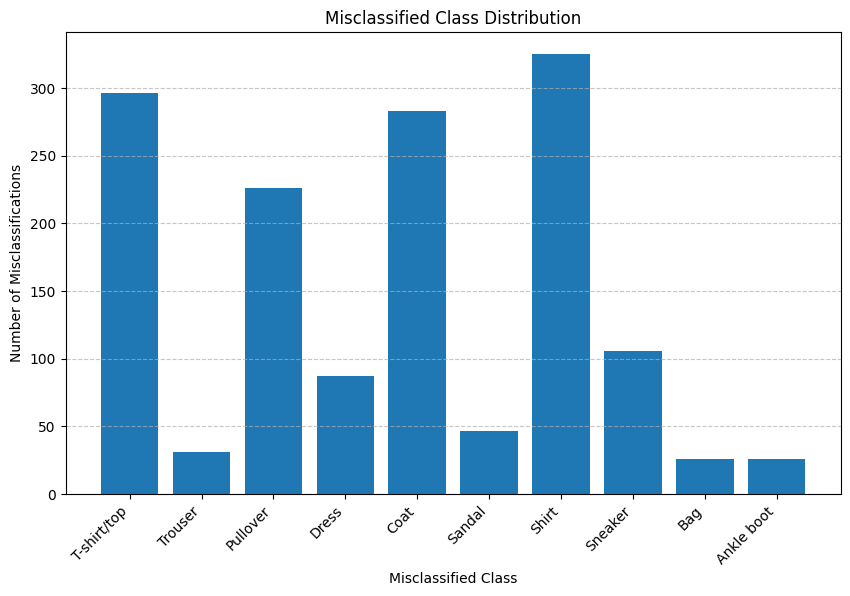

In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 잘못 분류된 이미지 확인
model.eval()
misclassified_images = []
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        misclassified_mask = predicted != labels
        misclassified_images.extend(inputs[misclassified_mask])
        predicted_labels.extend(predicted[misclassified_mask])
        true_labels.extend(labels[misclassified_mask])

# 잘못 분류된 이미지 및 예측과 실제 레이블 시각화 (최대 10개 이미지)
num_images = len(misclassified_images)
num_display = min(num_images, 10)  # 최대 10개 이미지까지 표시

plt.figure(figsize=(15, 6))
for i in range(num_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(misclassified_images[i].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, Actual: {true_labels[i]}")
    plt.axis('off')

plt.show()

# 잘못 분류된 클래스별 분포 시각화
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
misclassified_class_count = {class_name: 0 for class_name in classes}

for true_label, predicted_label in zip(true_labels, predicted_labels):
    true_class = classes[true_label]
    predicted_class = classes[predicted_label]
    if true_class != predicted_class:
        misclassified_class_count[true_class] += 1

plt.figure(figsize=(10, 6))
plt.bar(misclassified_class_count.keys(), misclassified_class_count.values())
plt.xlabel('Misclassified Class')
plt.ylabel('Number of Misclassifications')
plt.title('Misclassified Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
